In [3]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np

print(tf.__version__)

1.14.0


In [12]:
#loading ur dataset
mnist = keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data()

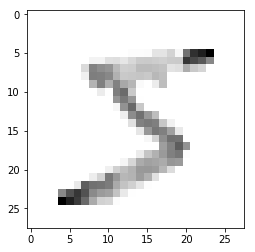

5


In [59]:
#displaying our data
import matplotlib.pyplot as plt

%matplotlib inline

#printing training data
plt.imshow(train_x[0], cmap=plt.cm.binary) #cm stands for colour maps
plt.show()
print(train_y[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

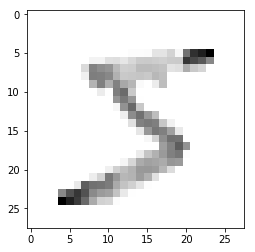

In [30]:
#it is good to normalize your data before training
train_x = keras.utils.normalize(train_x, axis = 1)
test_x = keras.utils.normalize(test_x,axis = 1)

#normalized data
print(train_x[0])
plt.imshow(train_x[0], cmap=plt.cm.binary)
plt.show()

In [32]:
#creating ur model
model = keras.models.Sequential()

#adding layers to it

#input layer
model.add(keras.layers.Flatten())#this stretches out your 2D input to 1D input
#hidden layes
model.add(keras.layers.Dense(128, activation=tf.nn.relu))#dense layers means ur nodes are fully connected
model.add(keras.layers.Dense(128, activation=tf.nn.relu))#and we are giving our nodes a relu activation
#output layer
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))#softmax sets the output such that sum of all output nodes equals 1

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [33]:
#compiling your model,adding optimizer, loss function
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
#fitting our model with training set
model.fit(train_x, train_y, epochs=3)
print('/n/n')

#testing accuracy and loss on test data
loss_val, acc_val = model.evaluate(test_x, test_y)
print(loss_val)
print(acc_val)

Epoch 1/3
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2763 - acc: 0.9173
Epoch 2/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1151 - acc: 0.9642
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0804 - acc: 0.9754
/n/n
10000/10000 [==============================] - 0s 48us/sample - loss: 0.1063 - acc: 0.9684
0.10625636364314706
0.9684


In [35]:
#saving ur model
model.save('number_recogniser')
model = tf.keras.models.load_model('number_recogniser')

#predicting with ur model
predictions = model.predict(test_x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


predicted digit:  2
true digit:  2


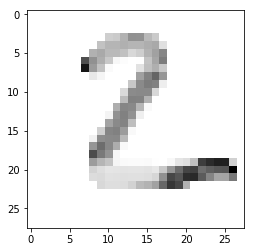

In [56]:
#knowing prediction for ith test data
i=1
plt.imshow(test_x[i], cmap=plt.cm.binary)
plt.show
print('predicted digit: ', np.argmax(predictions[i]))
print('true digit: ', test_y[i])

predicted digit:  7
true digit:  9


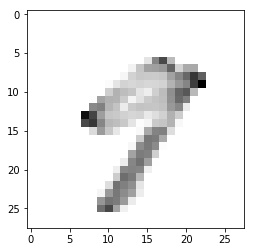

In [58]:
#predicting wrongly tested data
counter=0
for k in range(10000):
    if test_y[k]!=np.argmax(predictions[k]):
        counter+=1
        if counter==3:#true for 2nd wrongly predicted test data
            print('predicted digit: ', np.argmax(predictions[k]))
            print('true digit: ', test_y[k])
            plt.imshow(test_x[k], cmap=plt.cm.binary)
            plt.show
            break